In [1]:
from netCDF4 import Dataset
import pandas as pd
import numpy as np
import matplotlib as mpl
import copy
import dataclasses

import os, sys
import pickle as pkl
from scipy import interpolate
import scipy as sp

from fusiondls.Profile import *
from fusiondls.unpackConfigurationsMK import unpackConfigurationMK

from fusiondls import MagneticGeometry, SimulationInputs, run_dls, file_read, file_write
from fusiondls.analytic_cooling_curves import LfuncKallenbach

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))

from DLS.postprocess import *
from code_comparison.solps_pp import *
from sdtools.general.plotstyle import change_colors
change_colors("default")

%matplotlib inline
%load_ext autoreload
%autoreload 2


In [16]:
np.array(1,)

array(1)

In [6]:
geometry = MagneticGeometry.from_pickle(r"C:\Users\Mike\OneDrive\Project\DLS\DLS-gitB\docs\examples\eqb_store_lores.pkl", "V10", "ou")

settings = SimulationInputs(
    control_variable="density",  # One of 'density', 'impurity_frac' or 'power'
    SparRange=[0],  # List of S_parallel values to solve for
    qpllu0=1e9,  # Constant heat flux density at the x point
    nu0=1e20,  # Initial upstream density
    cz0=0.02,  # Constant mpurity fraction
    cooling_curve=LfuncKallenbach("Ar"),  # impurity cooling function
)

results = run_dls(settings, geometry, verbosity = 0)

Solving...0.00...











Complete in 2.8 seconds


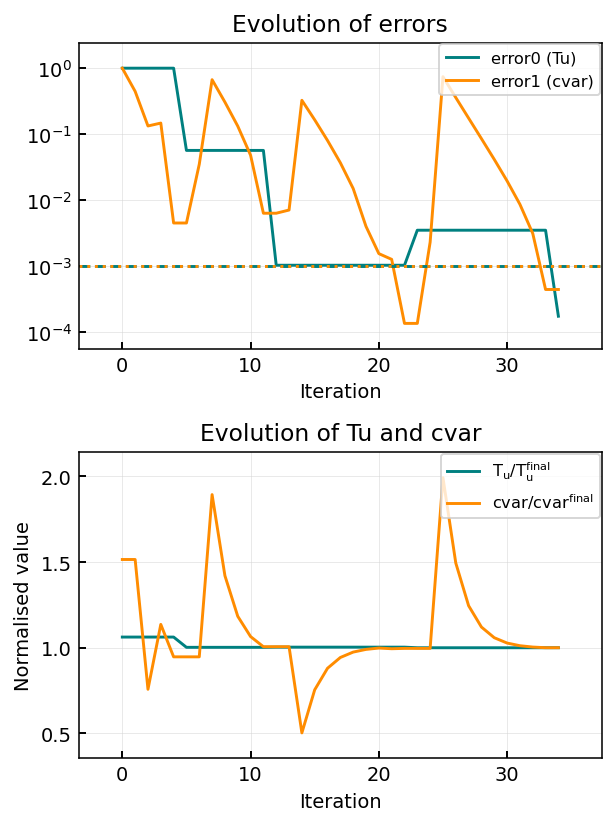

In [7]:
dls = FrontLocation(results)
dls.plot_performance()